# Day1 : Assumptions in Linear Regression

# Linearity

What if it fails:
    i. Bias in parameter estimate
    ii. Reduced predictive accuracy 
    iii. Invalid hypothesis test and confidence interval
    
How to check :-
    i. Scatter Plots : The Scatter plots can be drawn if the dimensions of the data is no too much big. 
        
    ii. Residual plots : The residuals plots can bee drawn and can be predicted the residuals plots are the simply graph between
        the difference between  actual value and predicted value and the actual value of the given data.
        
    iii. Polynomial Regression : We can use polynomial regression with different degree and check wheather the given r2_score is
        improving or not.
        
    

In [1]:
#code
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
x= 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8

z= x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)
df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['y1'] = y.reshape(100)
df['z1'] = z.reshape(100)
df

,x1,y1,z1
0,-1.799812,-0.867479,5.356524
1,-2.791709,-2.616262,16.910977
2,2.715829,-0.070811,9.391785
3,-0.144002,-1.580623,4.351555
4,1.767457,1.398879,7.685508
...,...,...,...
95,-1.407230,0.819797,2.688585
96,3.900138,-1.144152,19.987471
97,-2.147546,-0.749120,4.388540
98,0.714601,2.541373,12.264642


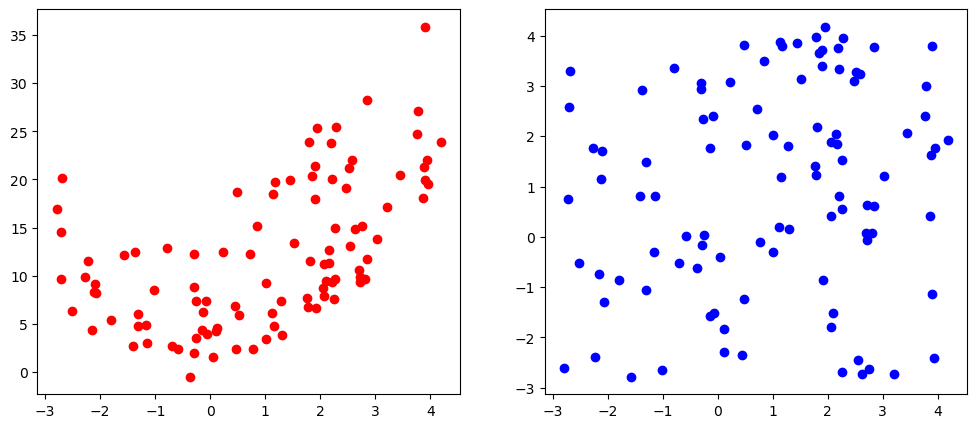

In [3]:
#ploting the scatter plot even we can plot the scatter plot between two variable for examples we can plot the scatter plot 
#between x1 and y1 and the second one can be plotted between x1 and z1 and we can conclude wheather it is linear or not. 

fig , (ax1, ax2) =plt.subplots(1,2 , figsize = (12,5))
ax1.scatter(df['x1'],df['z1'], color = "red")
ax2.scatter(df['x1'], df['y1'], color = "Blue")


by plotting the different variable with the result we can conclude that the given set of data is nott linear. 


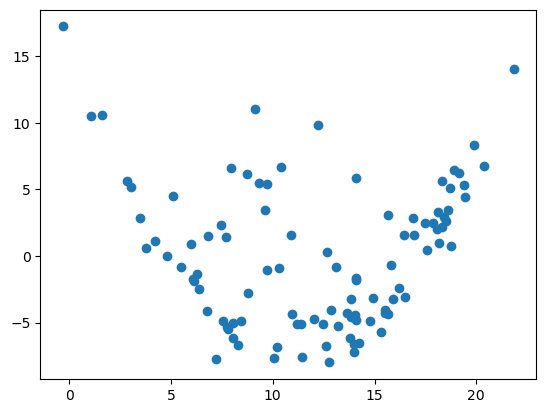

In [4]:
# Residual plot

x= df[['x1', 'y1']]
y = df['z1']

model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
residuals = y - y_pred

plt.scatter(y_pred, residuals)

In the above figure it clearly shows that the data are non linear

 using the polynomial Regression for checking and take the degree  2 or more and try calculating the r2_score then after that 
    if the r2_score keeps immproving according to the degree then we can conclude that the given set of th data are not linear
    

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection  import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predict = linear_model.predict(X_test)


linear_r2 = r2_score(y_test, y_predict)
linear_mse = mean_squared_error(y_test, y_predict)


#using the polynomial Regression

poly_feature = PolynomialFeatures(degree=2)
X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_predict_poly = poly_model.predict(X_test_poly)

#calculating r2_score and Mean squared Error

poly_r2 = r2_score(y_test, y_predict_poly)
poly_mse = mean_squared_error(y_test, y_predict_poly)

print(f'The r2_score of linear regression is {linear_r2} ')
print(f'The mean squared error of linear regreession is {linear_mse}')
print(f'The r2_score of the polynomial regression is {poly_r2}')
print(f'The mean squared error of polynomial regresssion is {poly_mse}')


The r2_score of linear regression is 0.4708449370581983 
The mean squared error of linear regreession is 28.531003850878346
The r2_score of the polynomial regression is 0.9735628001423101
The mean squared error of polynomial regresssion is 1.4254419994638687


Looking at the above result we can concude the that there is non lnearity in the data as the r2 score increases with polynomial
regression

What can we do if the assumption fails?
1. Transformations : Apply transformations to the dependent or independent variable to make their realtion more linear. common 
    transformations include logarithmic, square root and inverse transformations


2. Polynomial Regression : As shown above we can apply polynomial regression for the non-Linearity datas.
    
3. Piecewise Regresssion : We can divide the data set into different data sets and see wheather the group of the data set
    are linear or not. 
    
4. Using non parametric or semi parametric methods : We can use the non parametric or semi parametric methods which don't relies 
    on the linearity assumptions such as generalized active models (GAMS), kernel regression, splines etc.

The r_2 score of the non transformed data is 0.9007887768060907
The r_2 score of the transformed data is 0.9290590339678223


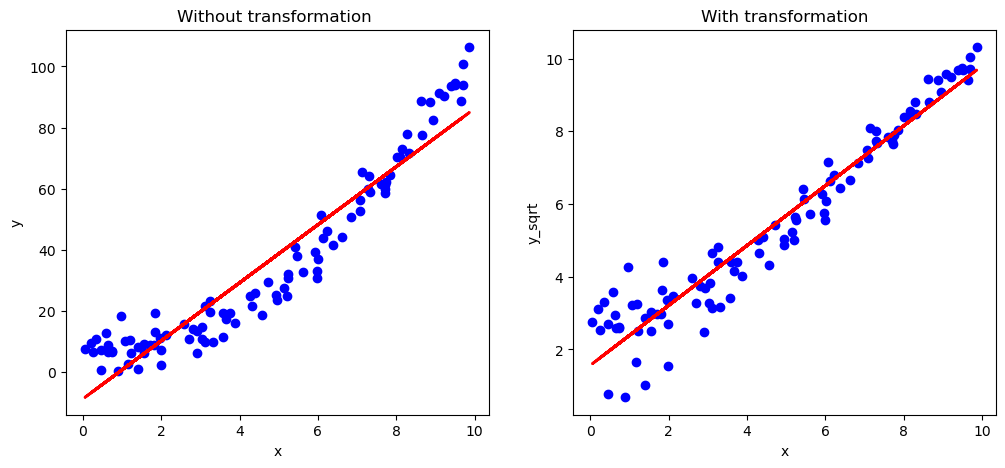

In [6]:
# coding for the transformation  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


np.random.seed(42)
x= 10 * np.random.rand(100,1)
y = x**2 + 5 + np.random.normal(0,5,(100,1))
y = np.abs(y)

y_sqrt = np.sqrt(y)

linear_model = LinearRegression()
linear_model.fit(x,y)
linear_transformed_model = LinearRegression()
linear_transformed_model.fit(x, y_sqrt)


linear_model_predict = linear_model.predict(x)
linear_transformed_model_predict  = linear_transformed_model.predict(x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))


ax1.scatter(x,y, color= "blue")
ax1.plot(x,linear_model_predict, color = "red", linewidth = 2 )
ax1.set_title("Without transformation ")
ax1.set_xlabel("x")
ax1.set_ylabel("y")


ax2.scatter(x,y_sqrt, color = "blue")
ax2.plot(x, linear_transformed_model_predict, color = "red", linewidth = 2)
ax2.set_title("With transformation")
ax2.set_xlabel("x")
ax2.set_ylabel("y_sqrt")


print(f'The r_2 score of the non transformed data is {r2_score(y, linear_model_predict)}')
print(f'The r_2 score of the transformed data is {r2_score(y_sqrt, linear_transformed_model_predict)}')

From the above example we can clearly see that the linerity can be gained by the transformation of the data.The first picture 
is plotted without the transformation of the data which show some non linear characterstics and the second graph is drawn  after
transforming the data which is after square rooting the y which give the data some linearity properties. The r2_socre too improves after the transformation which clearly shows that we can change the linearity of the data by transforming.

# Normality of Residuals 

Assumption:
    The error terms(residuals) are assumed to follow the normal distrubution with a mean of zero and a constant variable.


Consequences of Assumption voilations:
    1. Inaacurate hypothesis test : The f- test and t-test used to access the significance of the regression coefficent and the 
        overall model rely on the normality assumptions. If the residuals are not normally distrubuted these tests may produce
        inaccurate results which may leads  to wrong inference about the independent variable.
        
    2. Invalid confidence intervals: The confidence intervals of the regression are based on the noramality assumptions.
        
    3. Model Performance : The voilations of the normality assumptions may indicate that the chosen model is not best for the data
        potentially leading to reduced predictive accuracy. 
        
Checking the assumption:
    1. Residuals histogram 
    2. Q-Q plot

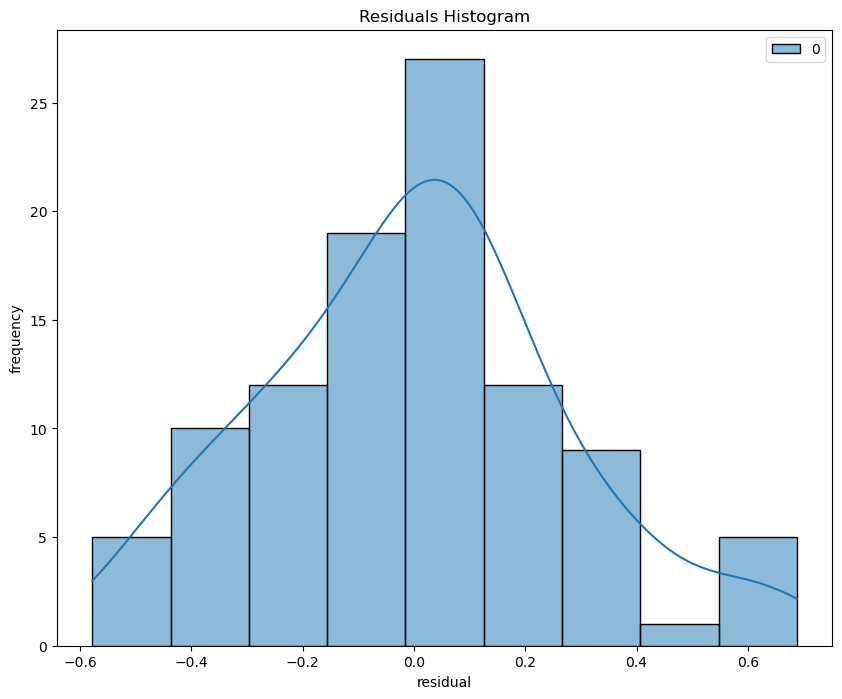

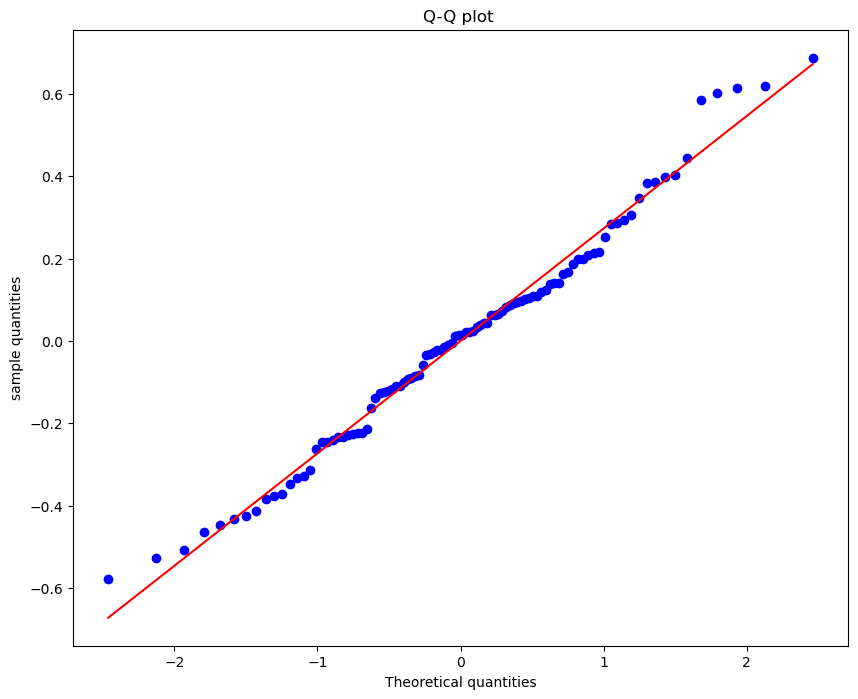

In [7]:
import seaborn as sns 
np.random.seed(42)
x= np.random.rand(100,1)
y = 3*x+ 5 + np.random.normal(0,0.3,(100,1))
y = np.abs(y)

model = LinearRegression()
model.fit(x,y)
y_predict =  model.predict(x)

residual = y- y_predict 


#historgram 

plt.figure(figsize=(10,8))
sns.histplot(residual ,kde = True)
plt.title("Residuals Histogram")
plt.xlabel("residual")
plt.ylabel("frequency")
plt.show()

# we can draw Q plots as well 

from scipy import stats
plt.figure(figsize = (10,8))
stats.probplot(residual.flatten(), plot = plt)
plt.title("Q-Q plot ")
plt.xlabel("Theoretical quantities")
plt.ylabel("sample quantities")
plt.show()

In [8]:
What if  fails ?
1. Model selection technique : Employ model selection technique like cross validation , AIC, BIC to choose the best model 
    among the different candidate models that can handle non normal residuals.
    
2. Robust Regression : Using Robust regression which are less sensitive to the distrubution of the residuals such as 
    M-estimation, least trimmed squares(LTS).
    
3. Use bootstrapping : Bootstrapping based model doesn't rely on the normality of the assumptions.
    
Note : We need to worry about the voilation of this assumptions because the According tthe central limit theorem if the number of 
    observation (n) is greater than 30 then the residuals are normal and which is true in most of the cases.

SyntaxError: unterminated string literal (detected at line 8) (478053463.py, line 8)

# Homoscedasticity 

The Assumption: 
    The spread of the error  terms( residuals )  should be constant across all levels of the levels of the independent 
    variability. 
    
    
What if fails ?
1. Inaccurate hypothesis test
2. Inaccureate confidence value

solution if fails 
1. Look for OVM 
2. Look for outliers and remove them. 
3. Transformation as above.



# Multicollinearity

Multicollinearity is the stastical phenomenoon that occurs when two or more independent variables in a multiple Regression 
are highly correalted. In other words, these variables exhibit a strong linear realtionship making it difficult to isolate 
the individual effects of each variable on the dependent variable.


When multicollinearity is bad ?

1. Inferencial Statistics 

# Feature Selection

All the input columns are known as Features. In machine learning with the help of features we try to predict the result. 
some time when we are dealing with p features we try to extract the subset of the p to predict. This process is known as 
Feature selection. 

Reason for feature selection :

1. <b>Curse of dimensionality </b> : In certain number of features only the optimum output is obtained. More than those features 
    maylead  bad outuput. For example calculating the flat price and we take the feature like square feet, no. of bathroom , 
    location and many more. In certain number of the feature the output is optimum if we add more or less we may not get the 
    optimum output. There is the concept of <b>  sparsity</b> which tells that if there are more dimension the distance between 
    the points is not realiable. 
    
    
2. <b> Computational Complexity </b> : After all our Model will run as a software application. If we have more dimensions hen 
this will be more expensive . 

3. <b>  Difficult Interpretability </b> : when we are dealing with Interpretability it's hard to interpret. 










# Feature Selection Technique in Machine Learning 

They are divided into four Sections : 
    
1. <b> Filter Based Selection Technique </b>
2. <b> Wrapper Method  </b>
3. <b> Embedded Technique </b> 
4. <b> Hybrid Technique  </b> 


## Filter Based Feature Selection 

Filter Based feature selection technique are the methods that uses statstical measures to score each of feature indepedently 
and select the subset of the feature on the basis of the score. 

<b> Variance  Threshold </b>
Variance threshold is mostly applied between two types of data. 
Constant and quasi constant data.
If the feature have constnat value the variance is 0 and we can claim that this feature have no role of determing the output.
and if the feature have most of the value constant for example out of 1200 datas if it have 1150 constant data we can also 
claim that this feature also doesn't play a big role in determing the output.

Steps : 
1. Defining the threshold frequency. Normally it is determined in between 0.1 to 0.01
2. Calculating the variance for the each feature.
3. Checking the variance of each of feature and droping the feature which doesn't meets the threshold variance.

Points to be consider while variance Threshold :
1. Ignores the target variables: We don't actually study the realtionship with output columns. It is univariate method. we may have feature with high variance but not a good realtion with output and we may have low variance and don't have good realtion with output.

2. Ignores the Feature Interactions : Variance threshold doesn't account the feature interactions. A feature with the low variance can bacome informative combining with the feature with high variance. 

3. Sensitive to data scaling : Same scale is needed for all the features.  For Example if we are setting the variance threshold is 0.1 and we have two data sets, one with the large scale such as number like 1000 , 1200 and more and another with the very small scale such as 0.1 and 0.2. The data with higher scale will not meet the threshold but the data with the small threshold will. so Data scaling so important. 

4. Arbitary Threshold value : We don't have predefined threshold value and the threshold value may differ according to the datasets.


<b> Correlation </b>

If we calcualte the correlation between the two feature then if they are strong linear realtionship we can drop the one and keep one. This method can be used for feature selection. For example if we have two feature f1 and f2 and if we calcualte the Pearson Correaltion Coefficient and got the value 0.95 we can claim that there is strong correlation between them. So we can drop any one of them more over dropping may depend which have strong relationship with the output column. 

Points to consider while Variance threshold are :

1. Linearity assumptions : The dropped columns may have non linear realtionship with the output columns which can create the problem in the prediction.

2. Doesn't Capture the complex realtionship : If we are reducing the feature then we may miss their complex relationship. For example if we have feature f1, f2 and f3 and drop the feature f2 according to the correlation but what if we can get even better if we study the relation between f1, f2 and f3 combined. 

3. Threshold Determination :Like the variance threshold there is no pre defined threshold value of the correlation.

4. Sensitive to the outliers 


In [38]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



DATA = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")
DATA.head()


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [39]:
# dropping the time column

data = DATA.drop('Time', axis =1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [40]:
#filling the Nan value with random value
for column in data.columns:
    #getting the min value and max_value
    min_value = data[column].min()
    max_value = data[column].max()
    
    #generating the random value 
    random_values = np.random.uniform(min_value, max_value, size=data[column].isnull().sum())
    
    #creating the series with the random value
    random_series = pd.Series(random_values, index=data[column][data[column].isnull()].index)
    
    #finally replacing the nan value
    data[column].fillna(random_series, inplace=True)
    

In [41]:
#Seprating the target and features
X= data.drop('Pass/Fail', axis =1)
y = data['Pass/Fail']

#spliting the train test data

X_train, X_test , y_train , y_test  = train_test_split(X,y, test_size = 0.25, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(1175, 590)
(392, 590)


In [42]:
# using logastic Regression in the unfiltered data
log_reg = LogisticRegression(max_iter =1000)
log_reg.fit(X_train, y_train)

D:\Annoconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:
#predicting the values

y_predict = log_reg.predict(X_test)
y_predict

#caluculating the auccary_score 
auccracy = accuracy_score(y_predict, y_test)
auccracy

0.9056122448979592

# Feature Selection

In [75]:
fDATA = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")
#Dropping the time columns 
fDATA.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [76]:
# Removing the duplicate columns 
duplicated_col = fDATA.columns[DATA.T.duplicated()]
fdata = fDATA.drop(columns =duplicated_col)
fdata.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


Here we can clearly see that the columns drop from 592 to 488. After dropping the duplicated data .Working with the large set of
data give the lots of duplicated data. So the intial step  is to drop them.

In [77]:
fdata.drop("Time", inplace= True, axis =1)
fdata.shape

(1567, 487)

In [103]:
#Using the Variance threshold
selector = VarianceThreshold(threshold=0.01)
sel = selector.fit(fdata)

columns = fdata.columns[sel.get_support()]

data_vt = sel.transform(fdata)

data_vt = pd.DataFrame(data_vt, columns=columns)

data_vt.shape

(1567, 315)

<b> Variance threshold make the columns 315 from 487 </b> 

In [111]:
# Using correaltion
cor_matrics = data_vt.corr().abs()
upper_tri = cor_matrics.where(np.triu(np.ones(cor_matrics.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_corr = data_vt.drop(to_drop, axis=1)
data_corr.shape

(1567, 162)

<b> Here correalation Drops the columns  from the 315 to 162 </b>

In [115]:
data_corr

,0,1,2,3,4,6,12,14,15,16,...,563,564,569,570,571,572,573,581,585,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,NaN,2.3630,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,208.2045,4.4447,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,0.9032,1.10,68.8489,535.0245,2.0293,11.21,0.1882,82.8602,3.1745,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,0.6511,7.32,25.0363,530.5682,2.0253,9.33,0.1738,73.8432,2.0544,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,NaN,99.3032,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,203.9867,11.7692,419.3404,10.2397,...,0.5671,4.98,15.4662,536.3418,2.0153,7.98,0.2363,203.1720,2.8669,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,204.0173,9.1620,405.8178,10.2285,...,0.6254,4.56,20.9118,537.9264,2.1814,5.48,0.3891,NaN,2.6238,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,NaN,NaN,NaN,NaN,...,0.8209,11.09,29.0954,530.3709,2.3435,6.49,0.4154,43.5231,3.0590,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,197.2448,9.7354,401.9153,9.8630,...,0.5671,4.98,15.4662,534.3936,1.9098,9.13,0.3669,93.4941,3.5662,-1.0


In [125]:
X= data_corr.drop("Pass/Fail", axis =1)
y = data_corr["Pass/Fail"]



#managing the Nan values
for column in data_corr.columns:
    #getting the min value and max_value
    min_value = data_corr[column].min()
    max_value = data_corr[column].max()
    
    #generating the random value 
    random_values = np.random.uniform(min_value, max_value, size=data_corr[column].isnull().sum())
    
    #creating the series with the random value
    random_series = pd.Series(random_values, index=data_corr[column][data_corr[column].isnull()].index)
    
    #finally replacing the nan value
    data_corr[column].fillna(random_series, inplace=True)

data_corr

,0,1,2,3,4,6,12,14,15,16,...,563,564,569,570,571,572,573,581,585,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.439600,7.955800,414.871000,10.043300,...,0.364912,25.475957,67.336433,533.8500,2.1113,8.95,0.3157,164.997832,2.3630,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.547000,10.154800,414.734700,9.259900,...,0.853005,8.417717,36.380267,535.0164,2.4335,5.92,0.2653,208.204500,4.4447,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.017900,9.515700,416.707500,9.314400,...,0.903200,1.100000,68.848900,535.0245,2.0293,11.21,0.1882,82.860200,3.1745,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.848200,9.605200,422.289400,9.692400,...,0.651100,7.320000,25.036300,530.5682,2.0253,9.33,0.1738,73.843200,2.0544,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.942400,10.566100,420.592500,10.338700,...,0.979263,8.220915,15.277583,532.0155,2.0275,8.83,0.2224,334.913657,99.3032,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,203.986700,11.769200,419.340400,10.239700,...,0.567100,4.980000,15.466200,536.3418,2.0153,7.98,0.2363,203.172000,2.8669,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,204.017300,9.162000,405.817800,10.228500,...,0.625400,4.560000,20.911800,537.9264,2.1814,5.48,0.3891,539.846516,2.6238,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,227.542496,3.239329,685.318920,30.729658,...,0.820900,11.090000,29.095400,530.3709,2.3435,6.49,0.4154,43.523100,3.0590,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,197.244800,9.735400,401.915300,9.863000,...,0.567100,4.980000,15.466200,534.3936,1.9098,9.13,0.3669,93.494100,3.5662,-1.0


In [133]:
X= data_corr.drop('Pass/Fail', axis =1)
y= data_corr['Pass/Fail']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

D:\Annoconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [137]:
#predicting the values

y_predict = log_reg.predict(X_test)
y_predict

#caluculating the auccary_score 
auccracy = accuracy_score(y_predict, y_test)
auccracy

0.9336734693877551